<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/MRI_Practice_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Subject 1

In [ ]:
# Let's load some other packages we need
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib # common way of importing nibabel


In [ ]:
mri_file = '/content/sub-01_ses-01_T1w.nii.gz'
img = nib.load(mri_file)

In [ ]:
print(type(img))

<class 'nibabel.nifti1.Nifti1Image'>


In [ ]:
print(img.shape)

(288, 288, 181)


In [ ]:
# here, we're storing the header attribute in a new variable, hdr, for easy of use
hdr = img.header

In [ ]:
hdr.get_zooms()  # it's a 1x1x1 mm MRI file!

(0.8680556, 0.8680556, 1.0000381)

In [ ]:
hdr.get_xyzt_units()

('mm', 'unknown')

In [ ]:
fmri_file = '/content/sub-01_ses-01_task-emnfb_run-01_bold.nii.gz'
f_img = nib.load(fmri_file)
print(f_img.shape)
print(f_img.header.get_zooms())
print(f_img.header.get_xyzt_units())

(96, 96, 16, 900)
(2.0833333, 2.0833333, 5.9998894, 1.0)
('mm', 'sec')


In [ ]:
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)

<class 'numpy.ndarray'>
(288, 288, 181)


In [ ]:
print(img_data)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
mid_vox = img_data[118:121, 118:121, 108:111]
print(mid_vox)

[[[1992.81766605 1913.0110693  1819.12095547]
  [1800.3429327  1908.31656361 1842.59348392]
  [1516.32533836 1922.40008068 1931.78909206]]

 [[1905.96931076 1936.48359776 1873.10777092]
  [1650.11875057 1920.05282784 1920.05282784]
  [1309.76708794 1830.8572197  1945.87260914]]

 [[1840.24623108 1936.48359776 1882.4967823 ]
  [1558.57588959 1889.53854084 1931.78909206]
  [1124.33411312 1666.54952049 1891.88579369]]]


In [ ]:
mid_slice_x = img_data[119, :, :]
print(mid_slice_x.shape)

(288, 181)


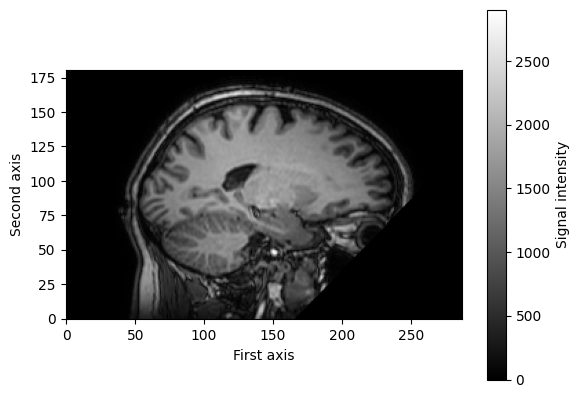

In [ ]:
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [ ]:
f_img_data = f_img.get_fdata()
print(f_img_data.shape)

(96, 96, 16, 900)


In [ ]:
# printing a small 3x3x3 volume of voxels from the first timepoint
print(f_img_data[38:41, 38:41, 20:23, 0])

[]


Shape of slice: (96, 16)


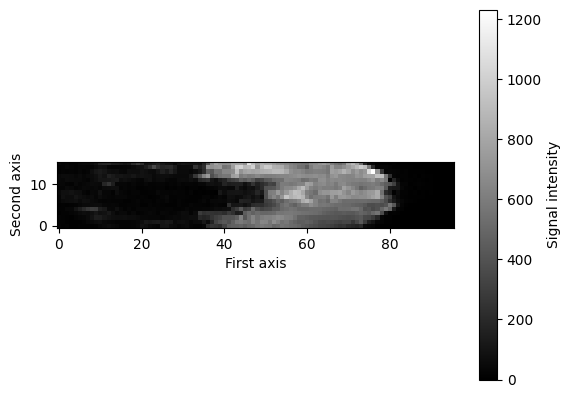

In [ ]:
mid_slice_x_fmri = f_img_data[39, :, :, 0]  # x = 39, t = 0
print("Shape of slice: %s" % (mid_slice_x_fmri.shape,))

plt.imshow(mid_slice_x_fmri.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [ ]:
mid_vox_ts = f_img_data[39, 39, 15, :]  # note the ":", saying: give me ALL the timepoints
print("Voxel timeseries shape: %s" % (mid_vox_ts.shape,))


Voxel timeseries shape: (900,)


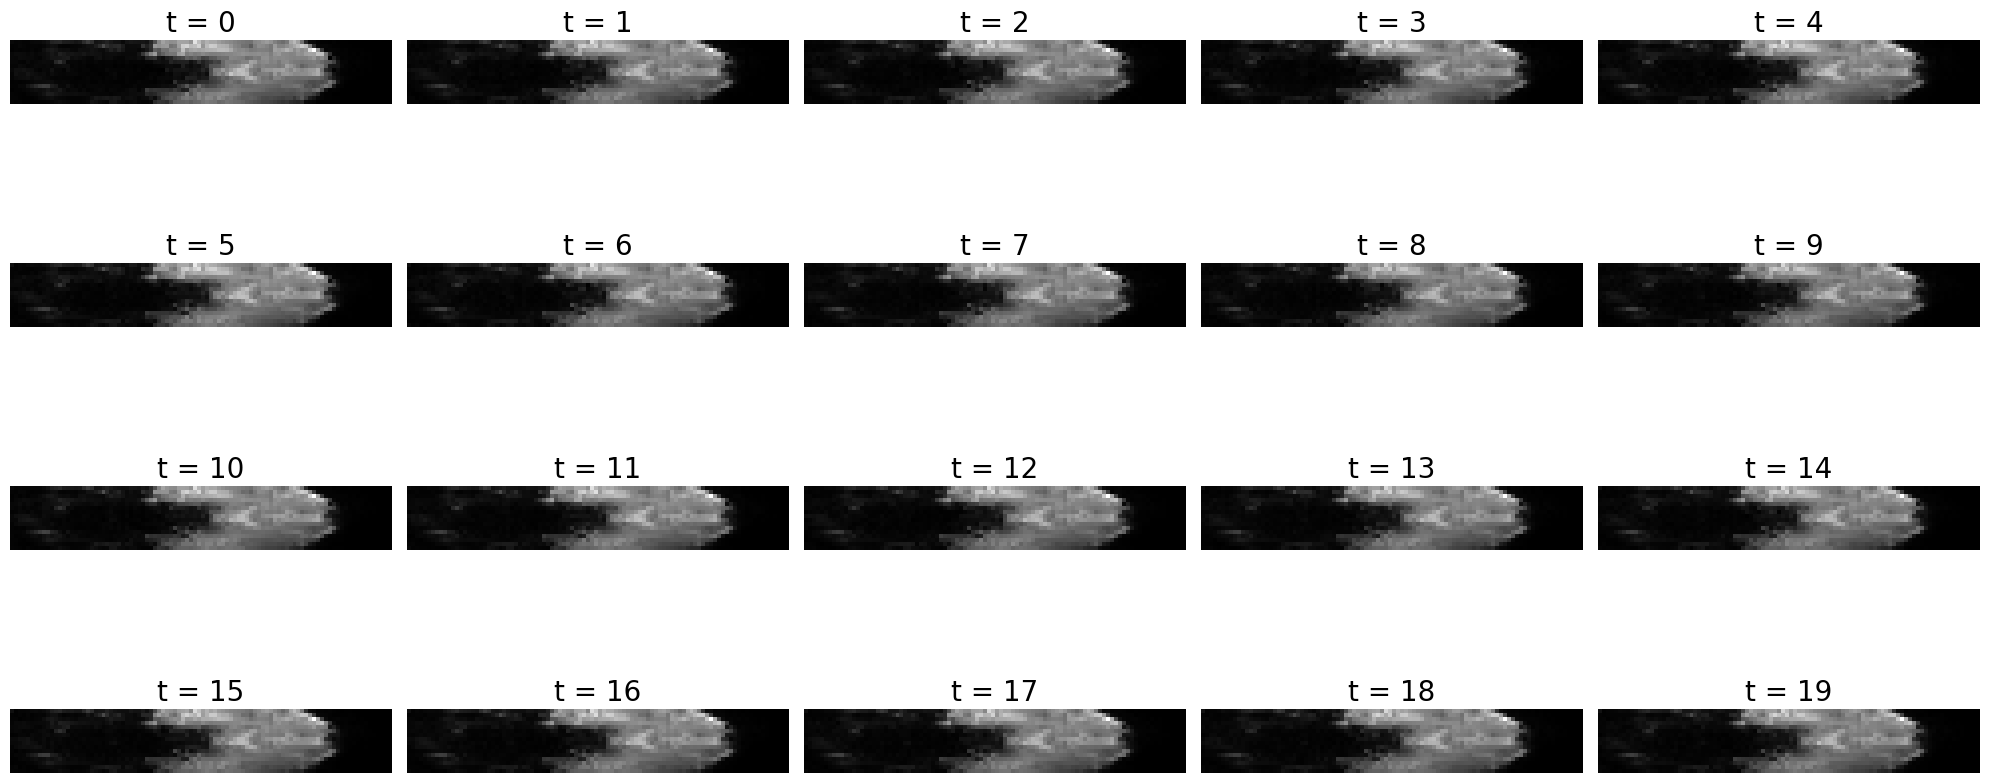

In [ ]:
from matplotlib import patches

fig, axes = plt.subplots(ncols=5, nrows=4, figsize=(20, 10))  # 20 timepoints
# Loop over the first 20 volumes/timepoints
for t, ax in enumerate(axes.flatten()):
    ax.imshow(f_img_data[39, :, :, t].T, cmap='gray', origin='lower')  # index with t!
    rect = patches.Rectangle((38, 30), 0, 2, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.axis('off')
    ax.set_title('t = %i' % t, fontsize=20)
fig.tight_layout()

636.2564198970795 751.8669222593307


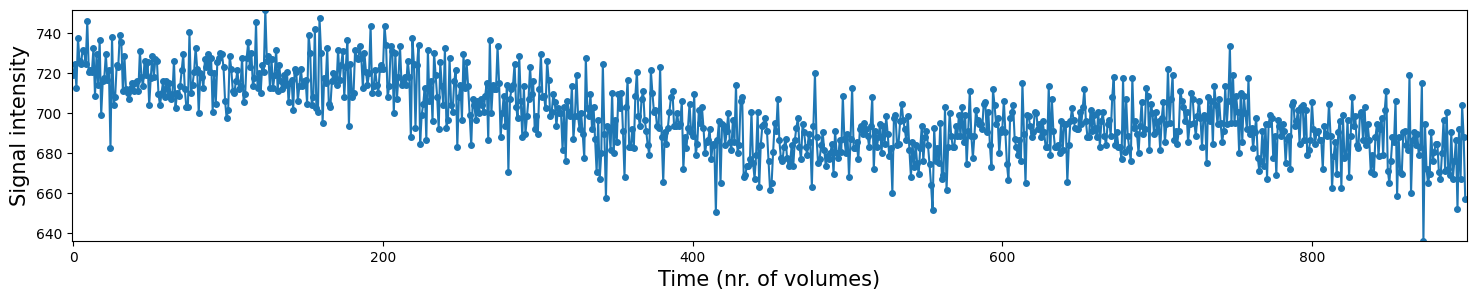

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Check the data first
print(np.min(mid_vox_ts), np.max(mid_vox_ts))

# Adjust the limits if necessary
plt.figure(figsize=(18, 3))
plt.plot(mid_vox_ts, 'o-', ms=4)  # Plotting with both markers and line
plt.xlim(-1, mid_vox_ts.size)  # X-axis limits based on data size
plt.ylim(np.min(mid_vox_ts), np.max(mid_vox_ts))  # Y-axis limits based on data range
plt.ylabel('Signal intensity', fontsize=15)
plt.xlabel('Time (nr. of volumes)', fontsize=15)
plt.show()


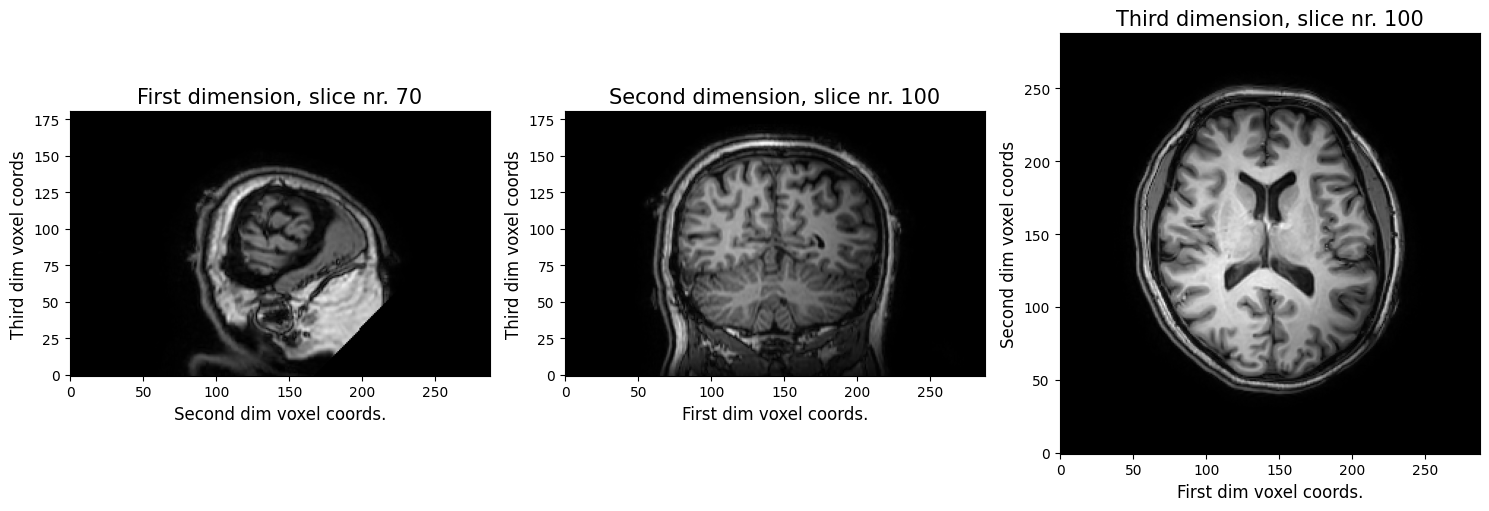

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_data[69, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)

ax[1].imshow(img_data[:, 99, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)

ax[2].imshow(img_data[:, :, 99].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)

fig.tight_layout()

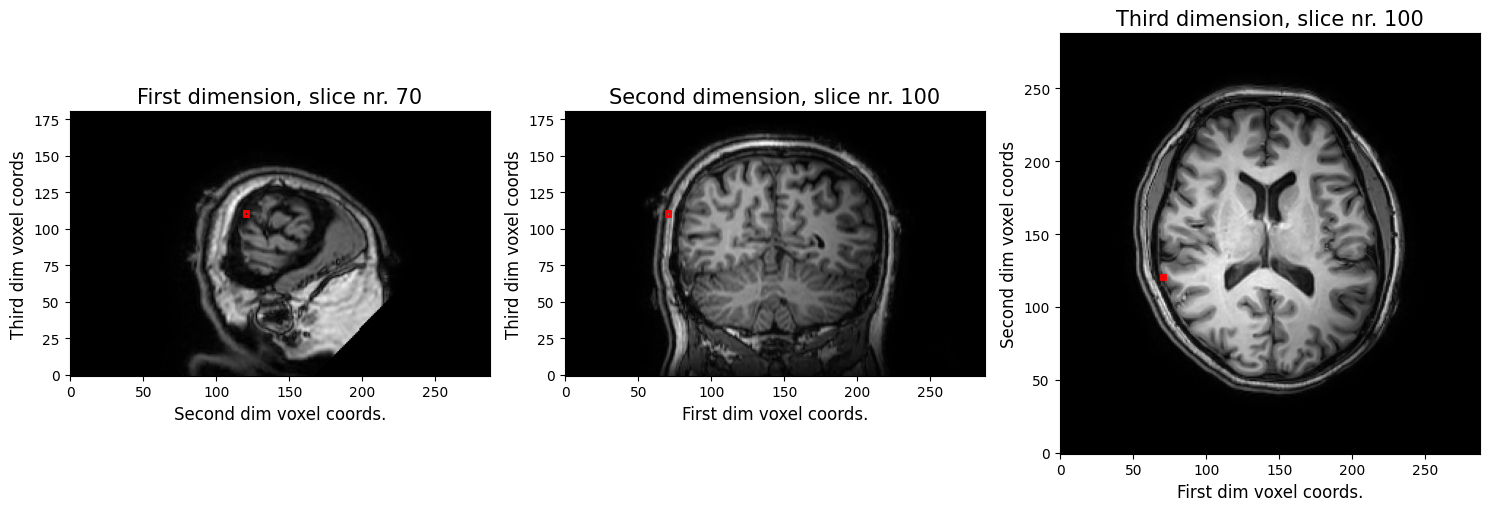

In [ ]:
import matplotlib.patches as patches
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_data[69, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)
rect = patches.Rectangle((119, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)

ax[1].imshow(img_data[:, 99, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[1].add_patch(rect)

ax[2].imshow(img_data[:, :, 99].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 119), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[2].add_patch(rect)

fig.tight_layout()

## Subject 2

In [69]:
mri_file = '/content/sub-02_ses-01_T1w.nii.gz'
img = nib.load(mri_file)

(96, 96, 16, 900)
(2.0833333, 2.0833333, 5.9994736, 1.0)
('mm', 'sec')
<class 'numpy.ndarray'>
(288, 288, 181)
(288, 181)


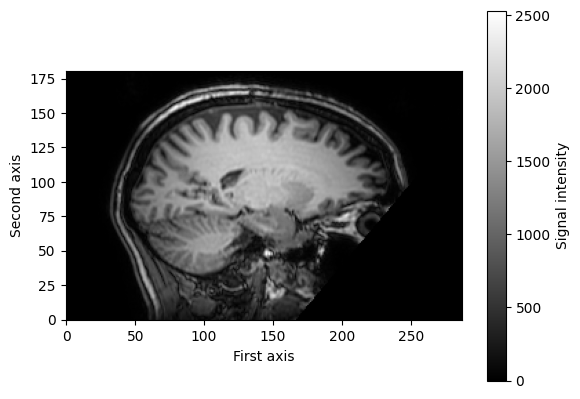

636.2564198970795 751.8669222593307


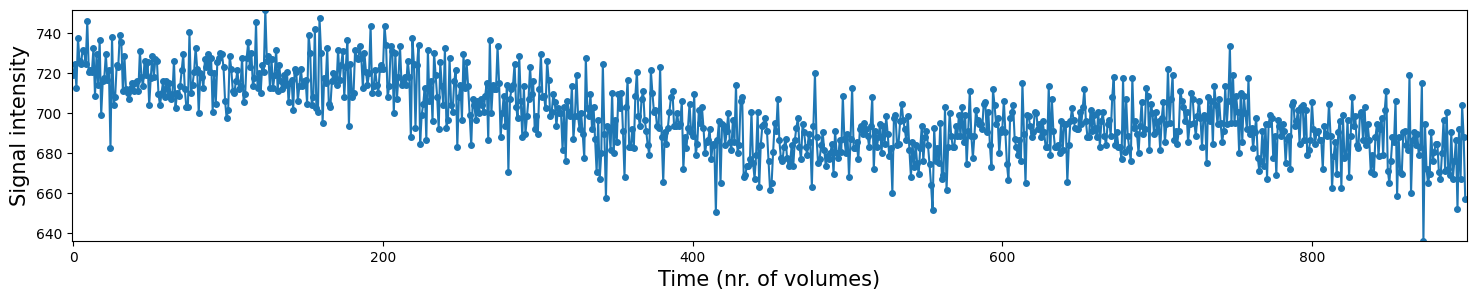

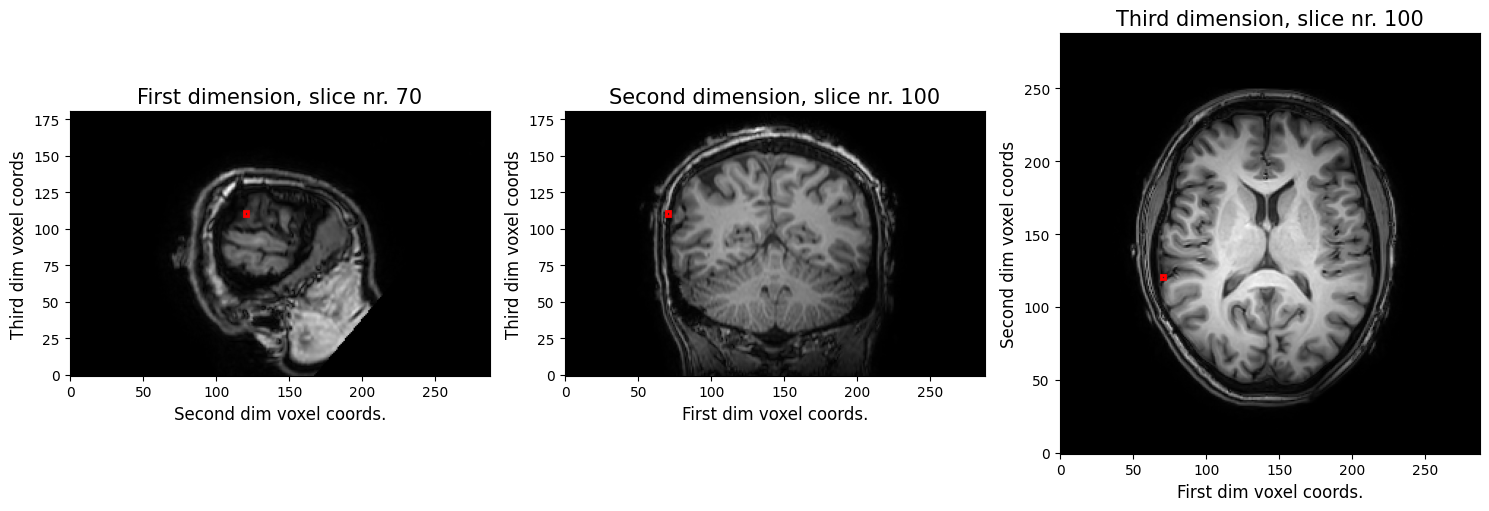

In [70]:
hdr = img.header

hdr.get_zooms()

hdr.get_xyzt_units()

fmri_file = '/content/sub-02_ses-01_task-emnfb_run-01_bold.nii.gz'
f_img = nib.load(fmri_file)
print(f_img.shape)
print(f_img.header.get_zooms())
print(f_img.header.get_xyzt_units())

img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)


mid_vox = img_data[118:121, 118:121, 108:111]

mid_slice_x = img_data[119, :, :]
print(mid_slice_x.shape)

# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()


import matplotlib.pyplot as plt
import numpy as np

# Check the data first
print(np.min(mid_vox_ts), np.max(mid_vox_ts))

# Adjust the limits if necessary
plt.figure(figsize=(18, 3))
plt.plot(mid_vox_ts, 'o-', ms=4)  # Plotting with both markers and line
plt.xlim(-1, mid_vox_ts.size)  # X-axis limits based on data size
plt.ylim(np.min(mid_vox_ts), np.max(mid_vox_ts))  # Y-axis limits based on data range
plt.ylabel('Signal intensity', fontsize=15)
plt.xlabel('Time (nr. of volumes)', fontsize=15)
plt.show()



import matplotlib.patches as patches
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_data[69, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)
rect = patches.Rectangle((119, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)

ax[1].imshow(img_data[:, 99, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[1].add_patch(rect)

ax[2].imshow(img_data[:, :, 99].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 119), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[2].add_patch(rect)

fig.tight_layout()

## Subject 3

In [ ]:
mri_file = '/content/sub-02_ses-01_T1w.nii.gz'
img = nib.load(mri_file)

hdr = img.header

hdr.get_zooms()

hdr.get_xyzt_units()

fmri_file = '/content/sub-02_ses-01_task-emnfb_run-01_bold.nii.gz'
f_img = nib.load(fmri_file)
print(f_img.shape)
print(f_img.header.get_zooms())
print(f_img.header.get_xyzt_units())

img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)


mid_vox = img_data[118:121, 118:121, 108:111]

mid_slice_x = img_data[119, :, :]
print(mid_slice_x.shape)

# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()


import matplotlib.pyplot as plt
import numpy as np

# Check the data first
print(np.min(mid_vox_ts), np.max(mid_vox_ts))

# Adjust the limits if necessary
plt.figure(figsize=(18, 3))
plt.plot(mid_vox_ts, 'o-', ms=4)  # Plotting with both markers and line
plt.xlim(-1, mid_vox_ts.size)  # X-axis limits based on data size
plt.ylim(np.min(mid_vox_ts), np.max(mid_vox_ts))  # Y-axis limits based on data range
plt.ylabel('Signal intensity', fontsize=15)
plt.xlabel('Time (nr. of volumes)', fontsize=15)
plt.show()



import matplotlib.patches as patches
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_data[69, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)
rect = patches.Rectangle((119, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)

ax[1].imshow(img_data[:, 99, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[1].add_patch(rect)

ax[2].imshow(img_data[:, :, 99].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 119), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[2].add_patch(rect)

fig.tight_layout()